Show counts and percentages for bar plots

In [8]:
import pandas as pd
from plotnine import *
from plotnine.data import mtcars

%matplotlib inline

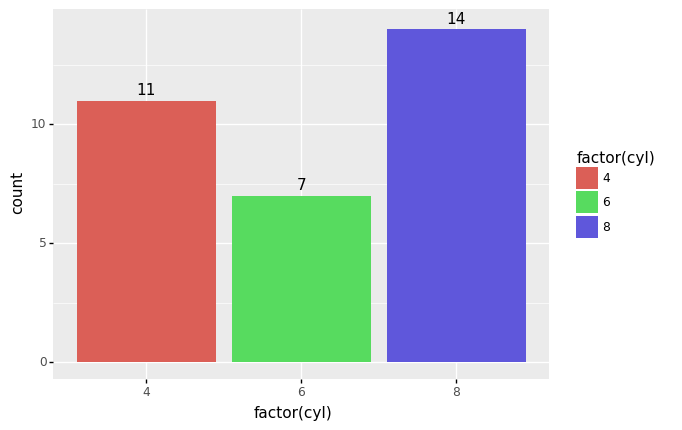

<ggplot: (-9223371906633391620)>

In [9]:
(ggplot(mtcars, aes('factor(cyl)', fill='factor(cyl)'))
 + geom_bar()
 + geom_text(
     aes(label='stat(count)'),
     stat='count',
     nudge_y=0.125,
     va='bottom'
 )
)

stat_count also calculates proportions (as prop) and a proportion can be converted to a percentage.

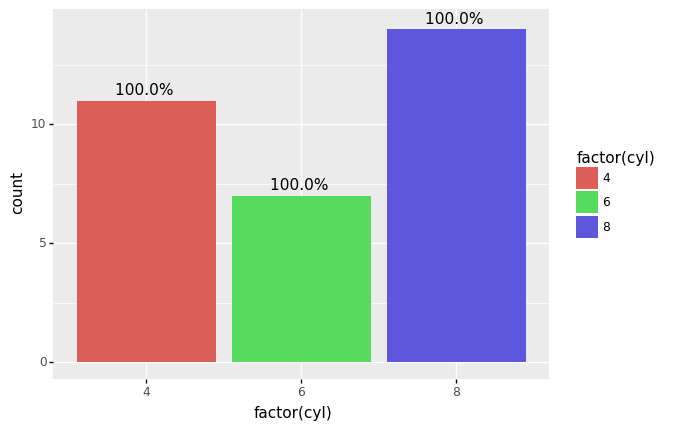

<ggplot: (-9223371906633235744)>

In [10]:
(ggplot(mtcars, aes('factor(cyl)', fill='factor(cyl)'))
 + geom_bar()
 + geom_text(
     aes(label='stat(prop)*100'),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}% '
 )
)

These are clearly wrong percentages. The system puts each bar in a separate group. We need to tell it to put all bar in the panel in single group, so that the percentage are what we expect.

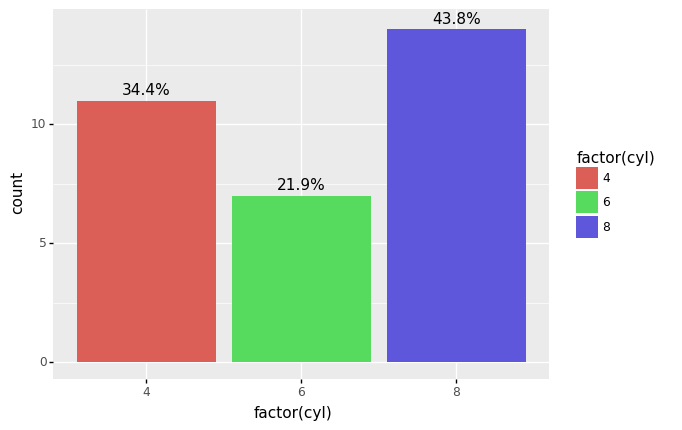

<ggplot: (-9223371906633569436)>

In [15]:
(ggplot(mtcars, aes('factor(cyl)', fill='factor(cyl)'))
 + geom_bar()
 + geom_text(
     aes(label='stat(prop)*100', group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'     
 )
)

For more on why automatic grouping may work the way you want, see this tutorial.

We can get the counts and we can get the percentages we need to print both. We can do that in two ways,

1. Using two geom_text layers.

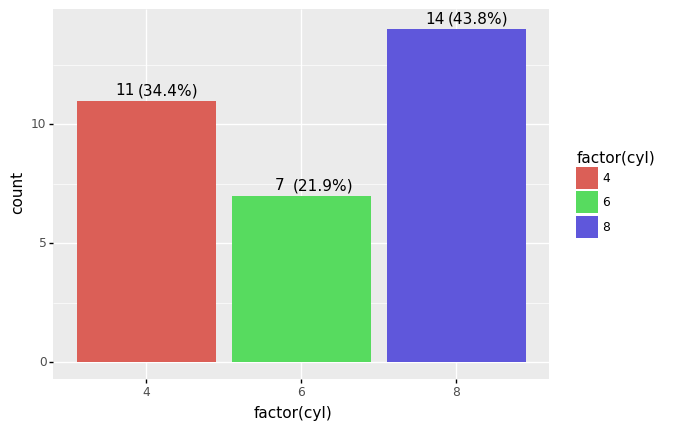

<ggplot: (-9223371906633569836)>

In [5]:
(ggplot(mtcars, aes('factor(cyl)', fill='factor(cyl)'))
 + geom_bar()
 + geom_text(
     aes(label='stat(count)'),
     stat='count',
     nudge_x=-0.14,
     nudge_y=0.125,
     va='bottom'
 )
 + geom_text(
     aes(label='stat(prop)*100', group=1),
     stat='count',
     nudge_x=0.14,
     nudge_y=0.125,
     va='bottom',
     format_string='({:.1f}%)'
 )
)

2. Using a function to combine the counts and percentages

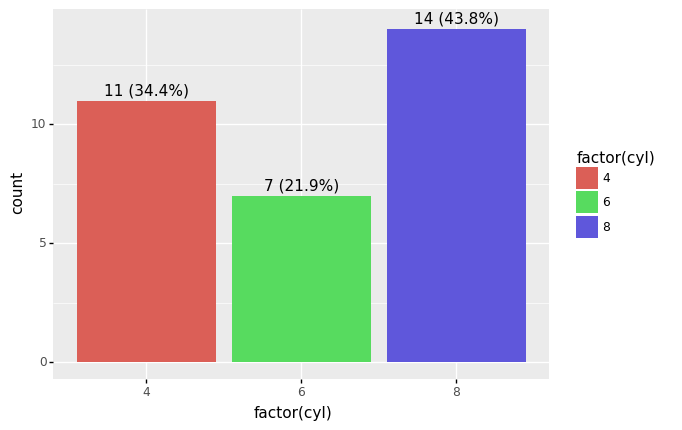

<ggplot: (-9223371906633448684)>

In [6]:
def combine(counts, percentages):
    fmt = '{} ({:.1f}%)'.format
    return [fmt(c, p) for c, p in zip(counts, percentages)]


(ggplot(mtcars, aes('factor(cyl)', fill='factor(cyl)'))
 + geom_bar()
 + geom_text(
     aes(label='stat(combine(count, 100*prop))', group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom'
 )
)

It works with facetting.

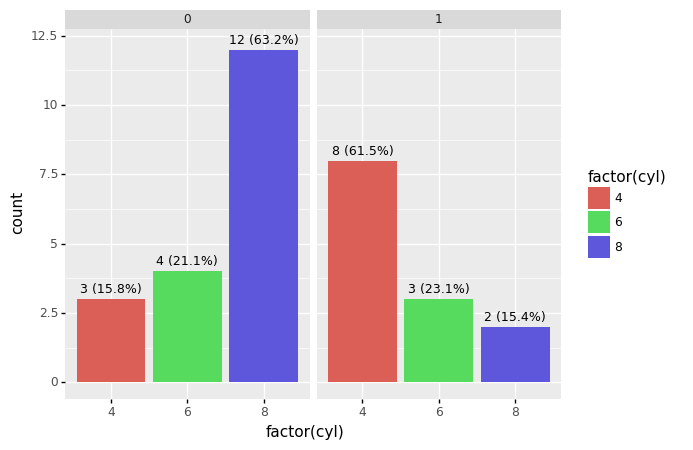

<ggplot: (-9223371906633259788)>

In [16]:
(ggplot(mtcars, aes('factor(cyl)', fill='factor(cyl)'))
 + geom_bar()
 + geom_text(
     aes(label='stat(combine(count, 100*prop))', group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     size=9     
 )
 + facet_wrap('am')
)

Credit: This example was motivated by the github user Fandekasp (Adrien Lemaire) and difficulty he faced in displaying percentages of bar plots.